In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import numpy as np

In [4]:
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-06-23/individuals.csv"

In [5]:
caribou_df = pd.read_csv(url)

In [6]:
caribou_df.shape

(286, 14)

In [7]:
caribou_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   animal_id             286 non-null    object 
 1   sex                   286 non-null    object 
 2   life_stage            67 non-null     object 
 3   pregnant              19 non-null     object 
 4   with_calf             84 non-null     object 
 5   death_cause           54 non-null     object 
 6   study_site            286 non-null    object 
 7   deploy_on_longitude   153 non-null    float64
 8   deploy_on_latitude    153 non-null    float64
 9   deploy_on_comments    87 non-null     object 
 10  deploy_off_longitude  56 non-null     float64
 11  deploy_off_latitude   56 non-null     float64
 12  deploy_off_type       286 non-null    object 
 13  deploy_off_comments   56 non-null     object 
dtypes: float64(4), object(10)
memory usage: 31.4+ KB


In [8]:
n_rows, n_cols = caribou_df.shape

In [14]:
caribou_df = caribou_df.dropna(thresh=.50*n_rows, axis=1)

In [15]:
caribou_df

,animal_id,sex,study_site,deploy_on_longitude,deploy_on_latitude,deploy_off_type
0,HR_151.510,f,Hart Ranges,NaN,NaN,unknown
1,GR_C04,f,Graham,NaN,NaN,unknown
2,GR_C03,f,Graham,NaN,NaN,unknown
3,HR_151.805,f,Hart Ranges,NaN,NaN,unknown
4,HR_151.760,f,Hart Ranges,NaN,NaN,unknown
...,...,...,...,...,...,...
281,QU_car195,f,Quintette,NaN,NaN,other
282,QU_car196,f,Quintette,NaN,NaN,other
283,KE_car199,f,Kennedy,NaN,NaN,unknown
284,KE_car200,f,Kennedy,NaN,NaN,unknown


In [18]:
filtered_rows = caribou_df[caribou_df["study_site"] == 'Quintette']

In [19]:
filtered_rows

,animal_id,sex,study_site,deploy_on_longitude,deploy_on_latitude,deploy_off_type
106,QU_car008,f,Quintette,-121.375940,54.955083,dead
107,QU_car007,f,Quintette,-121.514440,55.010779,other
111,QU_car014,f,Quintette,-121.007788,54.934704,removal
112,QU_car012,f,Quintette,-121.497521,55.086803,removal
113,QU_car013,f,Quintette,-121.135448,54.991737,other
...,...,...,...,...,...,...
278,QU_car172,f,Quintette,NaN,NaN,other
279,QU_car194,f,Quintette,NaN,NaN,other
280,QU_car197,f,Quintette,NaN,NaN,other
281,QU_car195,f,Quintette,NaN,NaN,other


In [23]:
averages = caribou_df.groupby('study_site')[['deploy_on_longitude', 'deploy_on_latitude']].mean()

In [24]:
averages

,deploy_on_longitude,deploy_on_latitude
study_site,,
Burnt Pine,-122.245822,55.393840
Graham,NaN,NaN
Hart Ranges,-122.115012,54.812317
Kennedy,-122.610095,55.220621
Moberly,-122.550542,55.773036
Narraway,-120.414843,55.063735
Quintette,-121.248854,54.558524
Scott,-123.351862,55.862879


In [28]:
averages = averages.rename(columns={
    'deploy_on_longitude': 'avg_longitude',
    'deploy_on_latitude': 'avg_latitude'
})

In [30]:
caribou_df = caribou_df.merge(averages, on='study_site', how='left')

In [31]:
caribou_df['deploy_on_longitude'].fillna(caribou_df['avg_longitude'], inplace=True)
caribou_df['deploy_on_latitude'].fillna(caribou_df['avg_latitude'], inplace=True)

In [33]:
caribou_df.drop(['avg_longitude', 'avg_latitude'], axis=1, inplace=True)

In [36]:
caribou_df.describe()

,deploy_on_longitude,deploy_on_latitude
count,231.000000,231.000000
mean,-121.922811,54.979906
std,0.701999,1.806774
min,-123.355710,28.134321
25%,-122.551687,54.812317
50%,-122.115012,55.094785
75%,-121.341075,55.220621
max,-120.215852,55.993975


<Axes: xlabel='deploy_on_longitude', ylabel='deploy_on_latitude'>

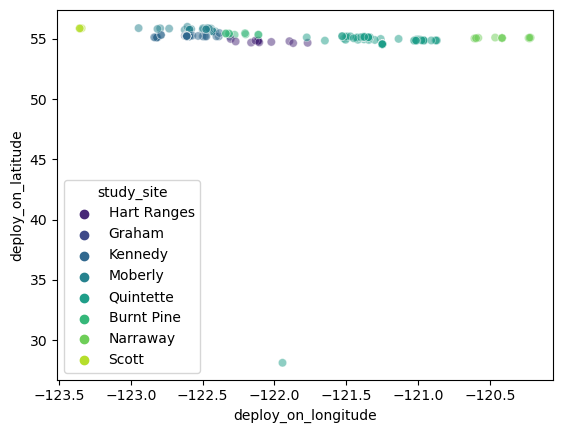

In [37]:
sns.scatterplot(x='deploy_on_longitude', y='deploy_on_latitude', data=caribou_df, hue='study_site', alpha=0.5, palette='viridis')

You can now see that at the study sites tend to stick around the same location now this is due to getting the relative area of where these sites were and modifying it so that the longitude and latidude fit in this region allowing for more consistant data across each caribou and the location it was located.

summary:

With this clean data its much easier to pick out the essental data this consisting of the latitude longitude giving us a relative location for the caribou. Along with the name given to each of them when tagged this allows for us to have a unique value for each caribou. They also included the sex and study site so we can get the categorize them together easier. Then lastly the deploy off type to see if they are still being tracked and if not what the reasoning wither it be death, removal, other which is specified.